In [1]:
from langchain_community.agent_toolkits import FileManagementToolkit
from langgraph.checkpoint.memory import MemorySaver
from langchain.agents import create_agent
from langchain_ollama import ChatOllama
import os

memory = MemorySaver()

In [2]:
working_dir = os.getcwd()

toolkit = FileManagementToolkit(
    root_dir=str(working_dir)
)

In [3]:
toolkit.get_tools()

[CopyFileTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent'),
 DeleteFileTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent'),
 FileSearchTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent'),
 MoveFileTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent'),
 ReadFileTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent'),
 WriteFileTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent'),
 ListDirectoryTool(root_dir='c:\\Users\\yasho\\OneDrive\\Desktop\\LANGGRAPH_TUT\\Files_Management_Agent')]

In [4]:
llm = ChatOllama(model="deepseek-v3.1:671b-cloud")

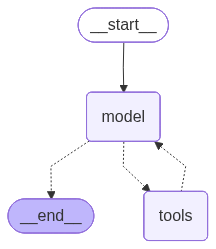

In [5]:
agent = create_agent(
    model=llm,
    tools=toolkit.get_tools(),
    system_prompt="""
    You are a helpful assistant for managing files on the computer. You have access to the file system management tools provided. 
    Use them to perform tasks related to file management as requested by the user. 
    you can create, read, write, update, delete, copy, move and list files.
    """,
    checkpointer=memory
)

agent

In [6]:
config = {"configurable": {"thread_id": "1"}}


while True:
    query = input("Enter your query: ")
    if query.lower() in ["exit", "quit"]:
        break

    response = agent.invoke({
        "messages": [{
            "role": "user",
            "content": query
        }]
    }, config=config)

    print("\nAgent response:")
    print(response["messages"][-1].content)


Agent response:
You want to manage files on your computer! I can help you with various file operations such as:

- Listing files and directories
- Reading file contents  
- Writing new files or appending to existing ones
- Copying, moving, or deleting files
- Searching for files based on patterns

What specific file operation would you like to perform? For example:
- "Show me what's in my Documents folder"
- "Read the contents of my notes.txt file"
- "Create a new file called reminder.txt with some text"
- "Copy my presentation.pdf to a backup folder"

Just let me know what you'd like to do!

Agent response:
I'd be happy to show you what's in your folder! However, I need to know which specific folder you'd like me to list. 

Could you please tell me the path to the folder you want to see? For example:
- Your current directory (just use "." or leave it empty for the current location)
- Your Documents folder ("Documents" or full path like "/Users/yourusername/Documents")
- A specific fo